In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import statistics
%matplotlib inline
sns.set(style='darkgrid')

In [193]:
data=pd.read_csv(r'C:\Users\guzel\Desktop\airbnb_NYC\listings.csv')

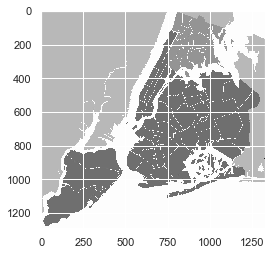

In [194]:
img=mpimg.imread('New_York_City_.png',0) 
plt.imshow(img)

In [195]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,10,48,2019-11-04,0.39,1,1
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,295,2019-11-22,4.67,1,1
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.60,1,19
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,49,2017-10-05,0.38,1,365
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,454,2019-11-21,3.52,1,242


In [196]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [197]:
data.drop(['host_name'], axis=1, inplace=True)

In [198]:
data.isnull().sum()

id                                    0
name                                 17
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10220
reviews_per_month                 10220
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [199]:
data.fillna({'name':0}, inplace=True)
data.fillna({'last_review':0}, inplace=True)
data.fillna({'reviews_per_month':0}, inplace=True)
data.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Detect Outliers and Ignore Them

In [200]:
print(len(data.price))
print(data.price.median())
print(data.price.mean())
print(len(data.price[data.price > data.price.std()]))
print(data.price.std())

50599
105.0
158.17178205102869
2908
348.08956197119085


# my attemps for figure out the anomalies:

In [201]:
min_p = min(data.price)
max_p = max(data.price)
print('Min price per night: {}, Max price per night: {} '.format(min_p,max_p))

Min price per night: 0, Max price per night: 10000 


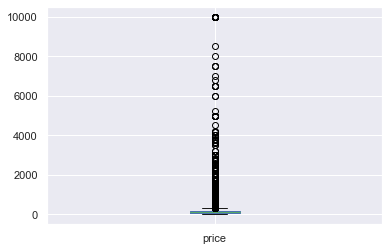

In [202]:
data.price.plot(kind='box')
plt.show()

# Because of the 1st boxplot above is totally squished, I have created 2nd boxplot below by limiting the price range to get rid of the extreme outliers. 

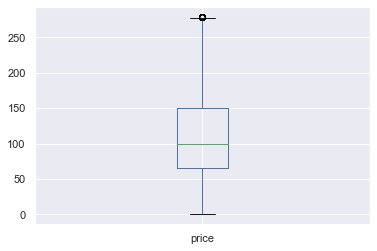

In [203]:
data.price[data.price< 280].plot(kind='box')
plt.show()

In [204]:
# I have created new Series by filtering price column from outleirs in sake of the codes below.
price_new = data.price[data.price < 280]

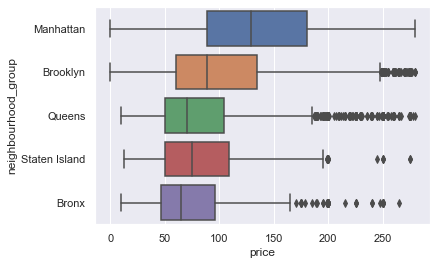

In [205]:
sns.boxplot(x=price_new, y=data.neighbourhood_group)

In [206]:
def find_anomalies():
    # Set upper and lower limit to 3 standard deviation
    price_std = data.price.std()
    price_mean = data.price.mean()
    cut_off = price_std * 3
    
    lower = price_mean - cut_off 
    upper = price_mean + cut_off

    price_anomalies = []    

    # Generate outliers
    for outlier in data.price:
        if outlier > upper or outlier < lower or outlier == 0:
            price_anomalies.append(outlier)
    return price_anomalies

find_anomalies()

[2000,
 2000,
 1300,
 1300,
 2000,
 2500,
 1395,
 1899,
 1700,
 1999,
 1500,
 6000,
 2000,
 2000,
 1500,
 1500,
 4000,
 5250,
 1500,
 1500,
 1500,
 1550,
 1250,
 1485,
 6500,
 2750,
 1500,
 2500,
 3750,
 1600,
 2300,
 4500,
 8000,
 6500,
 1400,
 2695,
 2000,
 1500,
 9999,
 2400,
 2000,
 1763,
 1450,
 2000,
 2000,
 1495,
 2000,
 10000,
 1600,
 1245,
 2000,
 2000,
 1500,
 9999,
 1731,
 1250,
 1800,
 2200,
 2100,
 2500,
 6000,
 1300,
 2000,
 2000,
 3800,
 10000,
 2350,
 2500,
 3000,
 2000,
 5000,
 2000,
 2000,
 1599,
 4000,
 2800,
 5000,
 0,
 1500,
 1599,
 1500,
 1795,
 0,
 0,
 0,
 0,
 0,
 0,
 5000,
 3900,
 0,
 1500,
 5000,
 10000,
 0,
 0,
 2200,
 2000,
 3000,
 2010,
 3210,
 4160,
 1500,
 10000,
 1500,
 1250,
 2000,
 2500,
 8500,
 2990,
 1395,
 1500,
 2500,
 1333,
 5000,
 1250,
 1700,
 3750,
 7000,
 1799,
 1700,
 6500,
 2545,
 3600,
 5000,
 2000,
 1880,
 1500,
 2999,
 7500,
 3000,
 3200,
 1350,
 1999,
 1750,
 9999,
 1500,
 2850,
 1315,
 1350,
 7500,
 4200,
 6800,
 1300,
 2000,
 1400,
 260

# Categorising as High, Medium, Low based on Price

In [207]:
def rank_price(hotel_price):
    if hotel_price<=75:
        return 'Low'
    elif hotel_price >75 and hotel_price<=500:
        return 'Medium'
    else:
        return 'High'

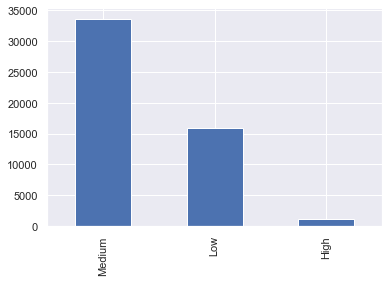

In [208]:
data['price'].apply(rank_price).value_counts().plot(kind='bar')

# Let's find the correlation between each categories:
## As you can see, there is no strong correlation bewteen this categories apart from the link between 'number_of_reviews' and 'reviews_per_month'. However this link is also understably logical because the more reviews, the more reviews per month.
## Thus, overall, all correlation between column categories are weak.

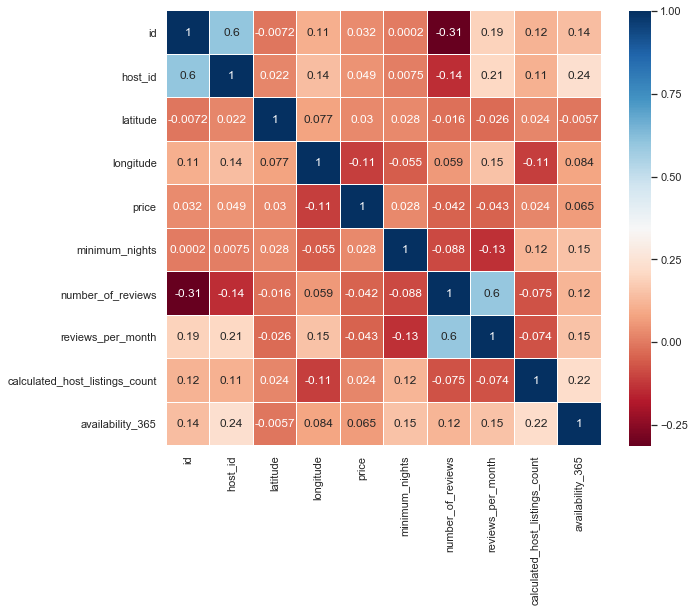

In [209]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

# What are the top words used in name by creating an Airbnb listing?

In [210]:
import csv
from wordcloud import WordCloud

word_list = []
word_list= '\t'.join([str(i) for i in data.name])

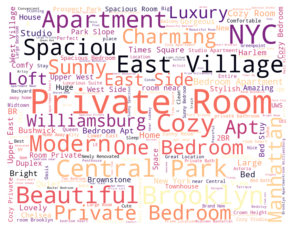

In [211]:
wordcloud = WordCloud(width=900, height=700, background_color="white", colormap="magma").generate(word_list)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# What is the avarage price per night in NYC?

In [212]:
top_reviewed_listings = data.nlargest(100,'number_of_reviews')
price_avrg = top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 94.52


In [213]:
filtered_price_avg = price_new.mean()
print('Average price per night: {}'.format(filtered_price_avg))

Average price per night: 113.50690172380062


# How do prices of listings vary by location?

In [214]:
data.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [215]:
sub_1= data.loc[data['neighbourhood_group'] == 'Manhattan']
sub_2= data.loc[data['neighbourhood_group'] == 'Brooklyn']
sub_3= data.loc[data['neighbourhood_group'] == 'Queens']
sub_4= data.loc[data['neighbourhood_group'] == 'Staten Island']
sub_5= data.loc[data['neighbourhood_group'] == 'Bronx']

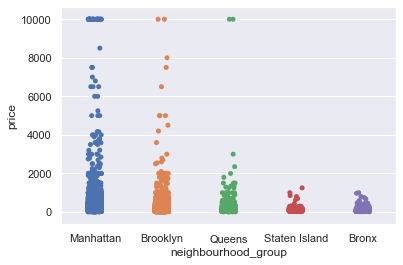

In [216]:
sns.stripplot(x=data.neighbourhood_group, y=data.price)

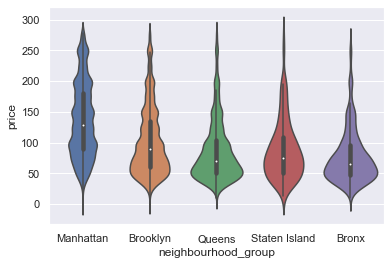

In [217]:
# There are a lot of otliers above, I am going to go with filtered price.
sns.violinplot(x=data.neighbourhood_group, y=price_new)

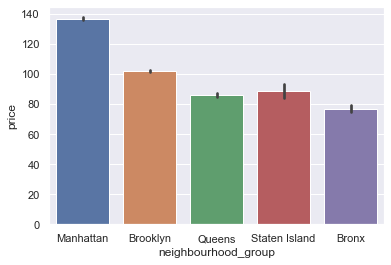

In [218]:
sns.barplot(x=data.neighbourhood_group, y=price_new)

In [219]:
# Above, I ignored the OUTLIERS IN THE PRICE COLUMN.

# What are the categories in room_type?

In [220]:
data.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [221]:
# Room type distribution
room1 = sub_1['room_type'].value_counts()
room2 = sub_2['room_type'].value_counts()
room3 = sub_3['room_type'].value_counts()
room4 = sub_4['room_type'].value_counts()
room5 = sub_5['room_type'].value_counts()
room = pd.DataFrame([room1,room2,room3,room4,room5],index=['Manhattan','Brooklyn','Queens','Staten Island','Bronx'])
room.head()

,Entire home/apt,Private room,Shared room,Hotel room
Manhattan,13386.0,7877.0,470.0,337.0
Brooklyn,9866.0,10332.0,499.0,43.0
Queens,2264.0,3679.0,216.0,37.0
Staten Island,194.0,179.0,5.0,NaN
Bronx,431.0,718.0,66.0,NaN


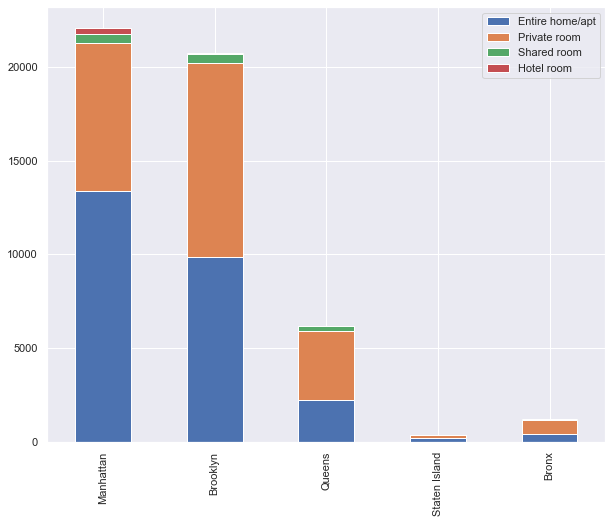

In [222]:
room.plot(kind='bar',stacked=True,figsize=(10,8))

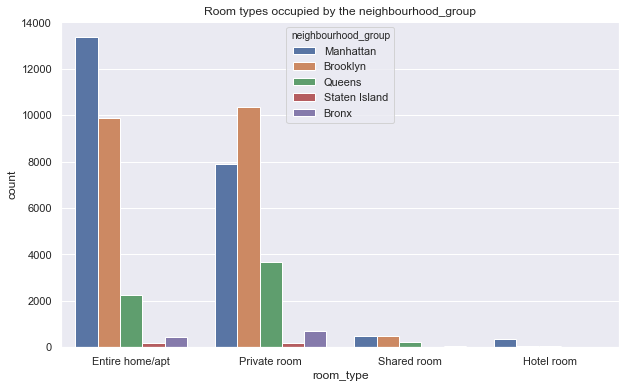

In [223]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = data)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

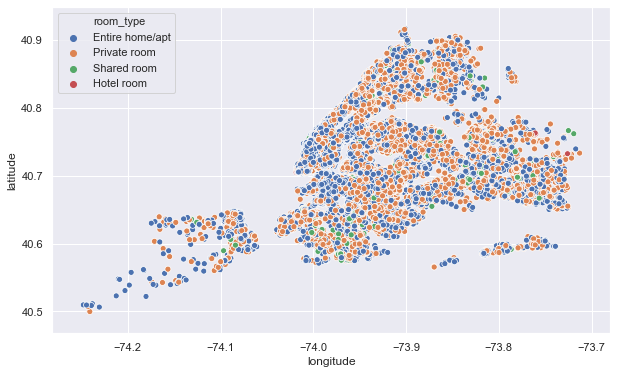

In [224]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude, data.latitude, hue=data.room_type )
plt.ioff()

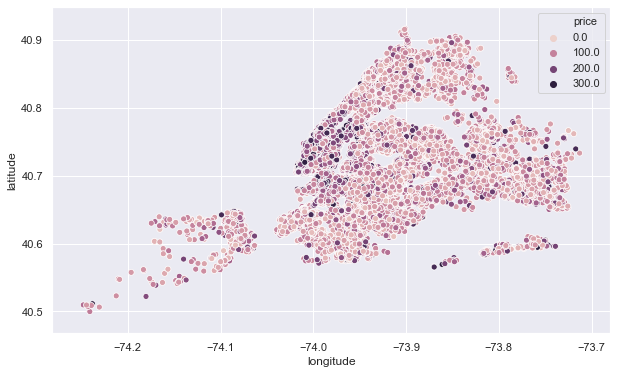

In [225]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude, data.latitude, hue=price_new)
plt.ioff()

# The map above is so ambigue, I am going to check borough by borough:

# Manhattan Price Map

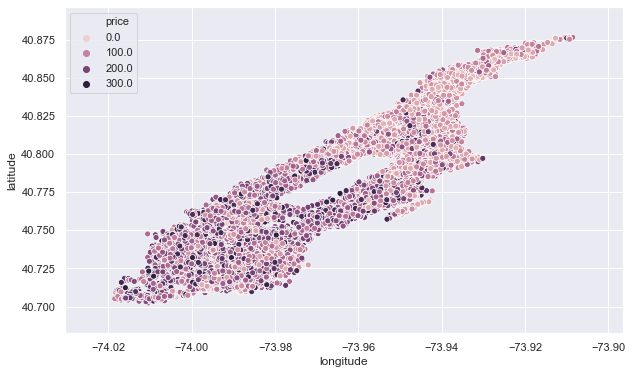

In [226]:
plt.figure(figsize=(10,6))
sns.scatterplot(sub_1.longitude, sub_1.latitude, hue=price_new)
plt.ioff()

## The gap above is Central Park.
## The latitude of Central Park, New York, NY, USA is 40.785091, and the longitude is -73.968285


### I wished to find out "How prices vary according to distance from 'Central Park'?" but couldn't filtered.

# Brooklyn Price Map

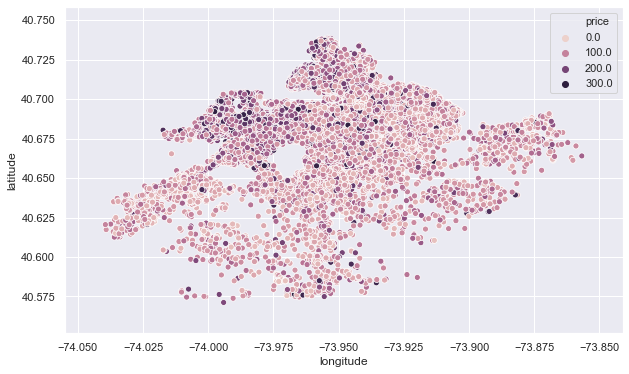

In [227]:
plt.figure(figsize=(10,6))
sns.scatterplot(sub_2.longitude, sub_2.latitude, hue=price_new)
plt.ioff()

# Queens Price Map

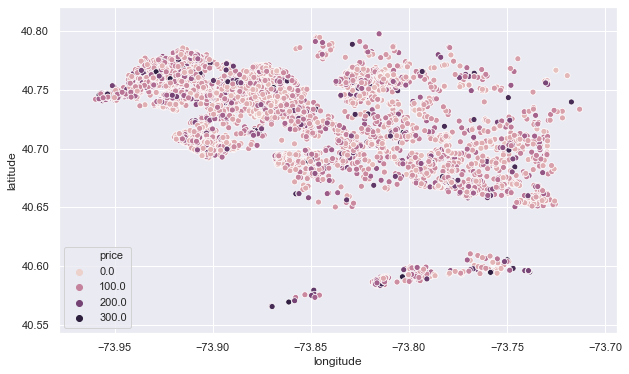

In [228]:
plt.figure(figsize=(10,6))
sns.scatterplot(sub_3.longitude, sub_3.latitude, hue=price_new)
plt.ioff()

# Staten Island Price Map

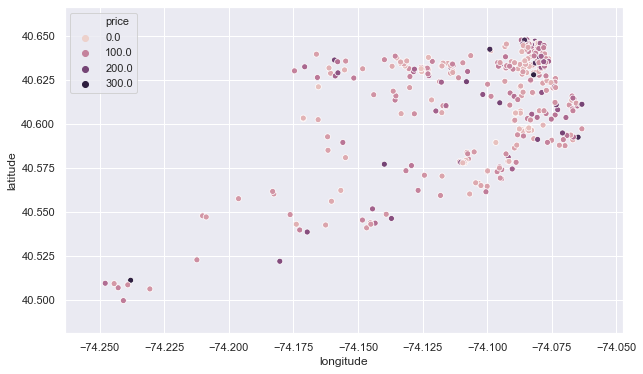

In [229]:
plt.figure(figsize=(10,6))
sns.scatterplot(sub_4.longitude, sub_4.latitude, hue=price_new)
plt.ioff()

# Bronx Price Map

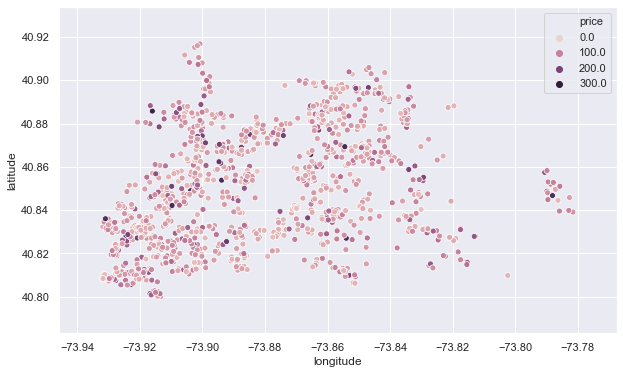

In [230]:
plt.figure(figsize=(10,6))
sns.scatterplot(sub_5.longitude, sub_5.latitude, hue=price_new)
plt.ioff()

# Which borough's availability over year is higher than others?

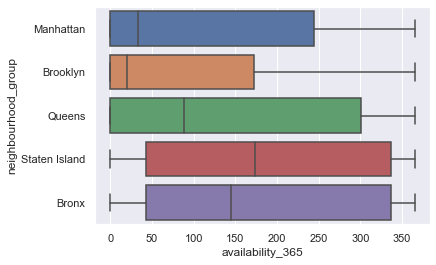

In [231]:
sns.boxplot(x=data.availability_365, y=data.neighbourhood_group)

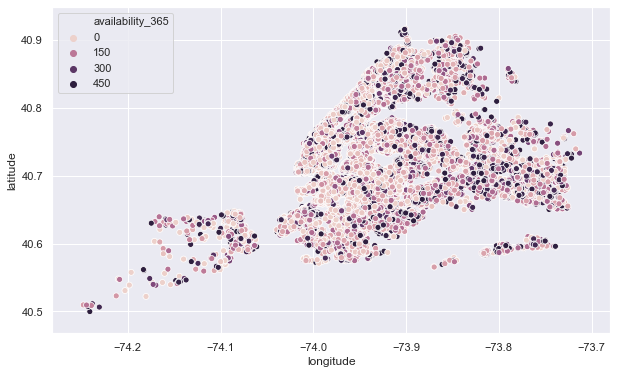

In [232]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude, data.latitude, hue=data.availability_365)
plt.ioff()

# Which location has more hotels? And how this affects other appartments' listing prices?



##Didn't work.

In [233]:
plt.figure(figsize=(10,6))
sns.scatterplot(room.longitude, room.latitude, hue=price_new)
plt.ioff()

AttributeError: 'DataFrame' object has no attribute 'longitude'

<Figure size 720x432 with 0 Axes>

# QUESTIONS I WANT TO ANSWER:
How do prices of listings vary by location? How does the demand for Airbnb rentals fluctuate across the year and over years? Are the demand and prices of the rentals correlated? What are the different types of properties in NYC? Do they vary by neighborhood? What localities in NYC are rated highly by guests?

Can you count something interesting? Can you find trends (e.g. high, low, increasing, decreasing, anomalies)? Can you make a bar plot or a histogram? Can you compare two related quantities? Can you make a scatterplot? Can you make a time-series plot?